<a href="https://colab.research.google.com/github/aninaredla/ML_Models_Unbalanced_Data/blob/main/m637_project_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving corporate_rating.csv to corporate_rating.csv


In [ ]:
import pandas as pd
import numpy as np
import time

# get the data
df = pd.read_csv('corporate_rating.csv')

# drop non-numerical predictors
df_numerical = df.drop(df.columns[1:6], axis=1)

df_numerical.head()

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [ ]:
# add numerical ratings in proper order

df_numerical['Rating'] = df_numerical['Rating'].str.strip().str.upper()

rating_array = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
rating_values = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

for i, row in df_numerical.iterrows():
    for j in range(len(rating_array)):
        if row['Rating'] == rating_array[j]:
            df_numerical.at[i, 'Rating'] = rating_values[j]
            break

df_numerical['Rating'] = df_numerical['Rating'].astype(int)

df_numerical.head()

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,8,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,7,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,7,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,7,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,7,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [ ]:
# X contains predictors
X = df_numerical.iloc[:, 1:26]

# Y contains labels (ratings)
y = df_numerical.iloc[:, 0]

In [ ]:
from sklearn.preprocessing import StandardScaler

start = time.perf_counter()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

end = time.perf_counter()

print(end-start)

0.004572892999988198


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.decomposition import PCA

start = time.perf_counter()

pca = PCA(n_components=11)

X_train_PCs = pca.fit_transform(X_train)
X_test_PCs = pca.transform(X_test)

end = time.perf_counter()

explained_variance = pca.explained_variance_ratio_

print(end - start)

0.0034345310000105655


In [ ]:
explained_variance

array([0.22184819, 0.14343107, 0.11267354, 0.09151599, 0.08344317,
       0.04857284, 0.04635757, 0.04528678, 0.0443995 , 0.04235591,
       0.03685982])

In [ ]:
np.sum(explained_variance)

np.float64(0.9167443885994018)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

start = time.perf_counter()

# Fit linear regression model on principal components
regressor = LinearRegression()
regressor.fit(X_train_PCs, y_train)

# Predict on test set
y_pred = regressor.predict(X_test_PCs)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)

y_pred_rounded = np.round(y_pred).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 1, 10)

accuracy = accuracy_score(y_test, y_pred_rounded)

end = time.perf_counter()



print("Accuracy:", float(f"{accuracy*100:.2f}"), "%")
print("MSE:", float(f"{mse:.3f}"))
print(f"Time elapsed: {end-start:.6f} seconds")

Accuracy: 35.22 %
MSE: 1.523
Time elapsed: 0.007223 seconds


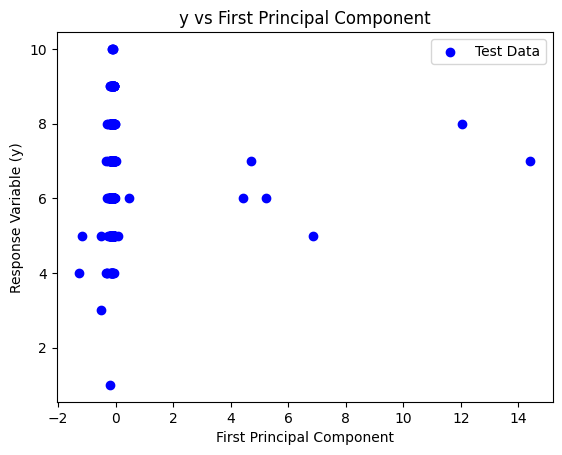

In [ ]:
import matplotlib.pyplot as plt

# Plot y against the first principal component
plt.scatter(X_test_PCs[:, 0], y_test, color='blue', label='Test Data')
plt.xlabel('First Principal Component')
plt.ylabel('Response Variable (y)')
plt.title('y vs First Principal Component')
plt.legend()
plt.show()

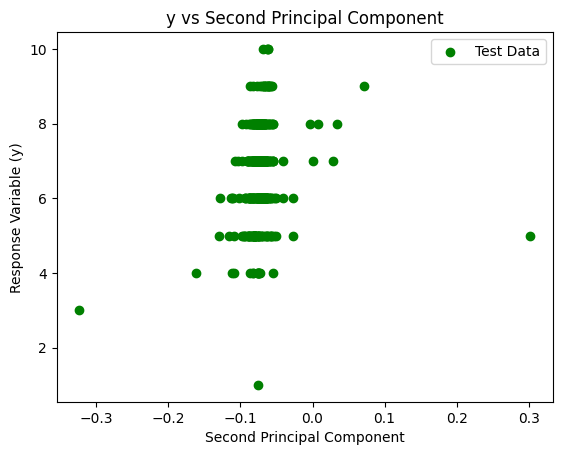

In [ ]:
# Plot y against the second principal component
plt.scatter(X_test_PCs[:, 1], y_test, color='green', label='Test Data')
plt.xlabel('Second Principal Component')
plt.ylabel('Response Variable (y)')
plt.title('y vs Second Principal Component')
plt.legend()
plt.show()

In [ ]:
# from sklearn.linear_model import LassoCV

# # Fit LassoCV with cross-validation (default 5-fold)
# lasso_cv = LassoCV(cv=5, max_iter=10000, random_state=42)
# lasso_cv.fit(X_train_PCs, y_train)

# # Print the optimal alpha found
# print("Optimal alpha (regularization parameter):", lasso_cv.alpha_)

# coefficients = pd.Series(lasso_cv.coef_)

# print("Lasso Coefficients with Feature Names:")
# print(coefficients)

# # Make predictions on the test data
# y_pred = lasso_cv.predict(X_test_PCs)

Optimal alpha (regularization parameter): 0.05558809228768051
Lasso Coefficients with Feature Names:
0     0.006016
1    -0.000000
2    -0.016741
3    -0.000000
4    -0.052599
5     0.061505
6     0.079810
7    -0.045821
8    -0.023120
9    -0.000000
10   -0.117222
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.5229172688567916


In [ ]:
from sklearn.metrics import accuracy_score

y_pred_rounded = np.round(y_pred).astype(int)
y_pred_rounded = np.clip(y_pred_rounded, 1, 10)

# Now compute accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)
print("Prediction Accuracy:", accuracy)

Prediction Accuracy: 0.3522167487684729


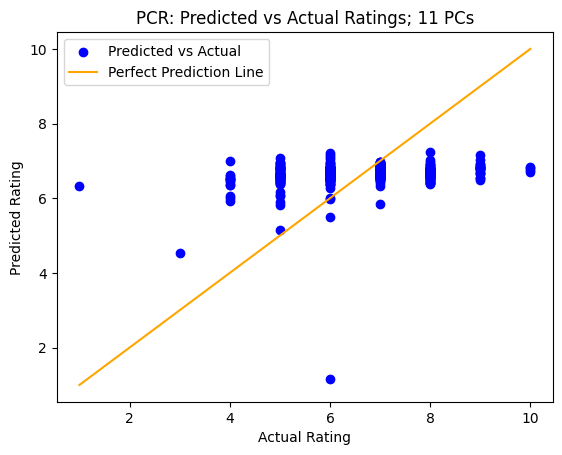

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Scatter plot of actual vs predicted ratings
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', label='Perfect Prediction Line')

plt.title('PCR: Predicted vs Actual Ratings; 11 PCs')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.legend()
plt.show()

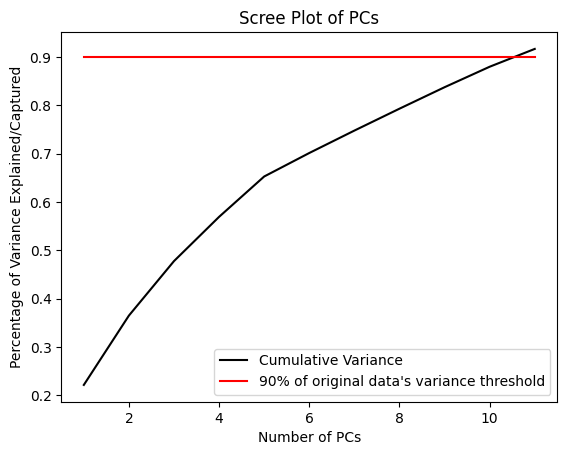

In [ ]:
pc_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

cumulative_variances = []
cumulative_variance = 0

min_var = 0.9
n = 11
min_var_arr = [min_var] * n

for var in explained_variance:
  cumulative_variance = cumulative_variance + var
  cumulative_variances.append(cumulative_variance)

plt.plot(pc_indices, cumulative_variances, color="black", label="Cumulative Variance")
plt.plot(pc_indices, min_var_arr, color="red", label="90% of original data's variance threshold")
plt.title("Scree Plot of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Percentage of Variance Explained/Captured")
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

times = []
accuracies = []
mses = []
num_pcs = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for num in num_pcs:
    start = time.perf_counter()

    pca = PCA(n_components=num)

    X_train_PCs = pca.fit_transform(X_train)
    X_test_PCs = pca.transform(X_test)

    # Fit linear regression model on principal components
    regressor = LinearRegression()
    regressor.fit(X_train_PCs, y_train)

    # Predict on test set
    y_pred = regressor.predict(X_test_PCs)

    # Evaluate performance
    y_pred_rounded = np.round(y_pred).astype(int)
    y_pred_rounded = np.clip(y_pred_rounded, 1, 10)



    end = time.perf_counter()
    times.append(end - start)

    accuracy = accuracy_score(y_test, y_pred_rounded)
    mse = mean_squared_error(y_test, y_pred)

    mses.append(mse)

    accuracies.append(accuracy)

In [ ]:
accuracies

[0.33251231527093594,
 0.33251231527093594,
 0.33251231527093594,
 0.33497536945812806,
 0.33497536945812806,
 0.3374384236453202,
 0.34236453201970446,
 0.34236453201970446,
 0.3399014778325123,
 0.3522167487684729]

In [ ]:
mses

[1.5988925945754842,
 1.5694981164690434,
 1.5701910769293361,
 1.5600489488708547,
 1.5533439197900412,
 1.513301581996001,
 1.5098755094668888,
 1.5089060283042233,
 1.5082567319395803,
 1.5229172688567916]

In [ ]:
times

[0.03378534300000524,
 0.012294809999986,
 0.0036140699999975823,
 0.010667221999995036,
 0.008522288999984085,
 0.025795778000002656,
 0.04184019900000635,
 0.029620379000022012,
 0.15657295500000146,
 0.07495152100000269]

Compare the number of pcs required to the number of non-zero features picked out by LASSO.

Find number of PCs required to explain 95% and 99% of variance

Maybe try svms with most influential lasso predictors?